In [24]:
import math
import numpy as np
import pandas  as pd
from matplotlib import pyplot as plt
import scipy.stats as st 
import random

## DISTRIBUCIÓN NORMAL

En estadística y probabilidad se llama distribución normal, distribución de Gauss, distribución gaussiana o distribución de Laplace-Gauss, a una de las distribuciones de probabilidad de variable continua que con más frecuencia aparece en estadística y en la teoría de probabilidades.

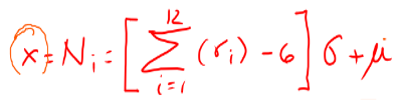

In [25]:
from PIL import Image
i = Image.open("normal.png")
width, height = i.size
i = i.resize((400,100))
display(i)

In [26]:
def normal(a, b, data, n):
    x = []
    suma = []
    resta = []
    for i in range(n):
        sum = 0.0
        for j in range(12):
            aleatorio = random.choice(data)
            sum = sum + aleatorio
            data.remove(aleatorio)
        suma.append(sum)
        resta.append(sum-6)
        val = (sum - 6) * a + b
        x.append(round(val,4))
    return x, suma, resta

# GENERACIÓN DE NÚMEROS ALEATORIOS

###  Algoritmos congruencial cuadrático

Es un algoritmo congruencial no lineal que tiene la siguiente ecuación recursiva:

> $X_{i+1}=(aX_i^2+bX_i+c)mod(m) \hspace{1cm} i=0,1,2,3,...N$

En este caso, los números $r_i$ pueden ser generados con la ecuación:

> $r_i=\frac{X_i}{m−1} \hspace{1cm} i=0,1,2,3,...,n$

De acuerdo con L'Ecuyer, las condiciones que deben cumplir los parámetros $m,a,b,c$ para alcanzar un periodo máximo de $N=m$ son:

> $m=2^g$

> $a$ debe ser número par

> $c$ debe ser número impar

> $g$ debe ser entero

> $(b-1)mod4=1$.

Números pseudoaleatorios generados a través del tiempo:


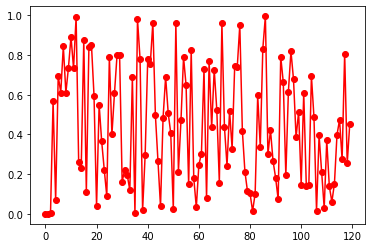

In [27]:
n = 10

def algoritmo_cuadratico(semilla,a,b,c,m):
  entero = (a*semilla**2+b*semilla+c)%m
  r = entero/(m-1)
  return r,entero

cantidad = n * 12
semilla = 3
pseudoaleatorios = []
for i in range(cantidad):
  r,semilla = algoritmo_cuadratico(semilla,a=1,b=0,c=0,m=991*997)
  pseudoaleatorios.append(round(r,4))

df = pd.DataFrame({'column':pseudoaleatorios}) 
df.to_csv('lab_01_algoritmo_blum_blum.csv', index=False, header=['aleatorio'],sep=';',decimal='.')
df.to_csv('lab_01_algoritmo_blum_blum.txt', index=False, header=['aleatorio'],sep=';',decimal='.')

print("Números pseudoaleatorios generados a través del tiempo:")
plt.plot(range(cantidad),pseudoaleatorios, marker="o", color="red")
plt.show()

# PRUEBAS DE UNIFORMIDAD

## Prueba de Chi-cuadrada.

Busca determinar si los números del conjunto $r_i$ se distribuyen de manera uniforme en el intervalo (0,1). Es necesario dividir el intervalo (0,1) en $m$ sub-intervalos, en donde es recomendable $m=\sqrt{n}$. Luego se clasifica cada número cada número pseudoaleatorio $r_i$ en los $m$ intervalos. Donde $O_i$ es la frecuencia observada y $E_i$ es la frecuencia esperada. $E_i$ es teóricamente igual a $n/m$.

> $\mathcal{X}_0^2=\sum_{i=1}^{m}\frac{(E_i-O_i)^2}{E_i}$

Si el valor estadístico $\mathcal{X}_0^2$ es menor al valor de tablas de $\mathcal{X}_{\alpha,m-1}^2$, entonces no se puede rechazar que el conjunto de numeros $r_i$ sigue una distribución uniforme. En caso contrario, se rechaza que $r_i$ sigue una distribución uniforme.

In [28]:
def prueba_chi_cuadrada(datos):
  n = len(datos)
  m = int(n**0.5)
  intervalo = 1/m
  frec_esperada = np.ones(m)*(n/m)
  frec_observada = np.zeros(m)
  for pseudoaleatorio in datos:
    posicion = int(pseudoaleatorio/intervalo) if pseudoaleatorio!=1 else m-1
    frec_observada[posicion] += 1
  return ((frec_esperada-frec_observada)**2/frec_esperada).sum()

datos = np.array(pseudoaleatorios)
print("El estadístico chi-cuadrada es: ",prueba_chi_cuadrada(datos))
a = 0.05
print("Tabla", st.chi2.ppf( 1 - (a/2), int(len(datos)**0.5) - 1))

El estadístico chi-cuadrada es:  10.333333333333334
Tabla 19.02276779864163


El estadístico $\mathcal{X}_0^2=\sum_{i=1}^{m}\frac{(E_i-O_i)^2}{E_i}=10.3333333$ es menor al estadístico correspondiente de la Chi-cuadrada $\mathcal{X}_{0.025,9}^2=19.0227$. En consecuencia, no se puede rechazar que los números $r_i$ siguen una distribución uniforme.

# Pruebas de independencia

## Prueba de corridas arriba y abajo

El procedimiento de esta prueba consiste en determinar una secuencia de números ($S$) que solo contienen unos y ceros, de acuerdo con la comparación entre $r_i$ y $r_{i-1}$ (cero si el número $r_i$ es menor que $r_{i-1}$, caso contrario uno). Después se determina el número de corridas observadas, $C_O$ (cantidad de unos o ceros consecutivos). Luego se calcula el valor esperado, la varianza del número de corridas y el estadístico $Z_0$ mediante las ecucaciones:

> $\mu_{C_O} = \frac{2n-1}{3}$

> $\sigma_{C_O}^2=\frac{16n-29}{90}$3

> $Z_0 = \lvert \frac{C_O - \mu_{C_O}}{\sigma_{C_O}} \rvert$

Si el estadístico $Z_0$ es mayor que el valor crítico $Z_{\alpha,2}$, se concluye que los números del conjunto $r_i$ no son independientes. De lo contrario no se puede rechazar que el conjunto de $r_i$ sea independiente.

In [29]:
data = np.array(pseudoaleatorios)
num = len(data)
s = np.floor(np.diff(data) + 1).astype(int) #diff encuentra la diferencia entre numeros consecutivos, diff[0 1 2] = [1 1], floor y +1 son artificio para cumplir la condicion de s
compresion = [valor for indice,valor in enumerate(s) if indice == 0 or valor != s[indice-1]] #crea un array sin valores consecutivos repetidos, [1 2 2 3] -> [1 2 3]
corridas = len(compresion)
media = (2*num-1)/3
varianza = (16*num-29)/90
Z_0 = abs((corridas-media)/varianza**0.5)
print("El estadístico Z_0 es: ", Z_0)

El estadístico Z_0 es:  0.5817604894236714


Como el estadístico $Z_0 = 0.58176$ es menor que el valor de la tabla de la normal estándar para $Z_{\alpha,2}=Z_{5\%,2}=1.96$, se concluye que no se puede rechazar que los números del conjunto $r_i$ son independientes.

In [31]:
a = 0.4
b = 12
x = []
suma = []
resta = []
x, suma, resta = normal(a, b, pseudoaleatorios.copy(), n)

In [47]:
y = []
for i in range(n):
    y.append(i+1)

sep = '|{}|{}|{}|{}|{}|'.format('-'*12,'-'*12, '-'*12, '-'*14, '-'*12)
print('{0}\n|    PIEZA   |    Σ(ri)   |  Σ(ri)-6   | [Σ(ri)-6]*a+b| (Vol. ONZA)| \n{0}'.format(sep))
for pos , cal, cal2, cal3, cred in zip(y, suma, resta, x , x):
    print('| {:>10.0f} | {:>10.4f} | {:>10.4f} | {:>12.4f} | {:>10.4f} |\n{}'.format(pos,cal, cal2, cal3, cred,  sep))

|------------|------------|------------|--------------|------------|
|    PIEZA   |    Σ(ri)   |  Σ(ri)-6   | [Σ(ri)-6]*a+b| (Vol. ONZA)| 
|------------|------------|------------|--------------|------------|
|          1 |     3.8204 |    -2.1796 |      11.1282 |    11.1282 |
|------------|------------|------------|--------------|------------|
|          2 |     5.4187 |    -0.5813 |      11.7675 |    11.7675 |
|------------|------------|------------|--------------|------------|
|          3 |     5.9788 |    -0.0212 |      11.9915 |    11.9915 |
|------------|------------|------------|--------------|------------|
|          4 |     4.5366 |    -1.4634 |      11.4146 |    11.4146 |
|------------|------------|------------|--------------|------------|
|          5 |     6.7433 |     0.7433 |      12.2973 |    12.2973 |
|------------|------------|------------|--------------|------------|
|          6 |     4.9193 |    -1.0807 |      11.5677 |    11.5677 |
|------------|------------|------